# Dataset information

In [19]:
from pymatviz import ptable_heatmap_plotly
from ase.io import read
from mof_benchmark.experiments.scripts.utils import structure_to_files
from tqdm import tqdm
import matplotlib.pyplot as plt
from pypalettes import load_cmap

In [17]:
from mof_benchmark.analysis.plot.plots import style

In [20]:
from tueplots import cycler

cmap = load_cmap("Prism")
palette = cmap.colors

plt.rcParams.update(style(column="full", family="sans-serif"))
plt.rcParams.update(cycler.cycler(color=palette))

## Gather dataset information

In [2]:
atom_counts = []
chemical_species = {}
atomic_weights = []

In [3]:
files = structure_to_files("main_set")

In [4]:
for file in tqdm(files):
    atoms = read(file)

    atom_counts.append(len(atoms))

    for symbol in atoms.symbols:
        if symbol not in chemical_species:
            chemical_species[symbol] = 0

        chemical_species[symbol] += 1

    atomic_weights.append(atoms.get_masses().sum())

 10%|█         | 10/100 [00:01<00:10,  8.46it/s]/home/tu/tu_tu/tu_zxoyu44/miniforge3/envs/mof_benchmark/lib/python3.12/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'hexagonal' is not interpreted for space group Spacegroup(191, setting=1). This may result in wrong setting!
  warnings.warn(
 32%|███▏      | 32/100 [00:07<00:26,  2.53it/s]/home/tu/tu_tu/tu_zxoyu44/miniforge3/envs/mof_benchmark/lib/python3.12/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'orthorhombic' is not interpreted for space group Spacegroup(59, setting=1). This may result in wrong setting!
  warnings.warn(
 51%|█████     | 51/100 [00:14<00:24,  1.96it/s]/home/tu/tu_tu/tu_zxoyu44/miniforge3/envs/mof_benchmark/lib/python3.12/site-packages/ase/io/cif.py:408: UserWarning: crystal system 'orthorhombic' is not interpreted for space group Spacegroup(62, setting=1). This may result in wrong setting!
  warnings.warn(
 60%|██████    | 60/100 [00:15<00:07,  5.37it/s]/home/tu/tu_tu/tu_zxoyu44/mini

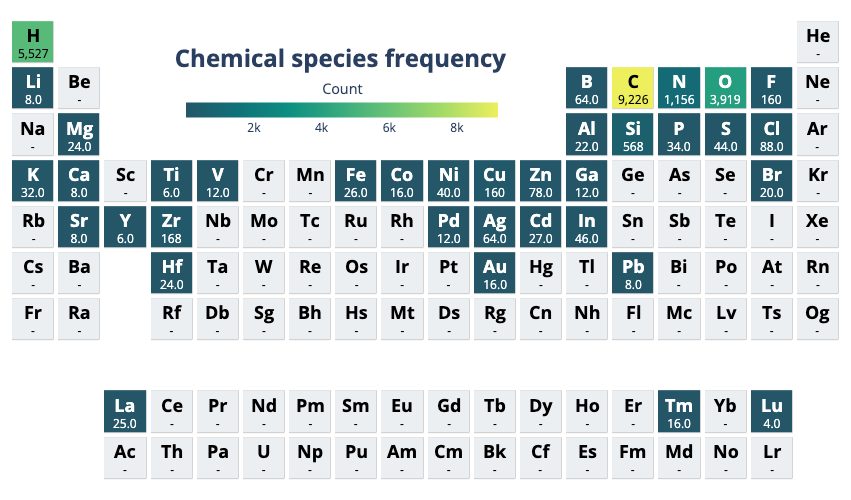

/home/tu/tu_tu/tu_zxoyu44/miniforge3/envs/mof_benchmark/lib/python3.12/site-packages/kaleido/scopes/base.py:177: ResourceWarning:

unclosed file <_io.BufferedWriter name=64>

/home/tu/tu_tu/tu_zxoyu44/miniforge3/envs/mof_benchmark/lib/python3.12/site-packages/kaleido/scopes/base.py:177: ResourceWarning:

unclosed file <_io.BufferedReader name=65>



In [31]:
fig = ptable_heatmap_plotly(
    values=chemical_species, 
    nan_color="#ECEFF1", 
    colorscale="aggrnyl",
    colorbar={"title":"Count", "orientation": "h"}
)
fig.layout.title = dict(text="<b>Chemical species frequency</b>", x=0.4, y=0.9, font=dict(size=24))
fig.show()
fig.write_image(f"figures/dataset_species_frequency.pdf")

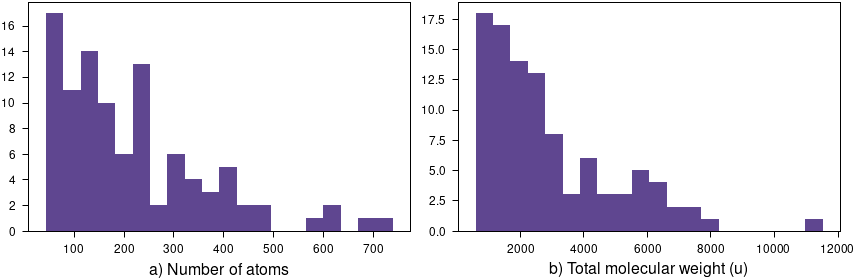

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(6,2))

ax[0].hist(atom_counts, bins=20)
ax[0].set_xlabel("a) Number of atoms")

ax[1].hist(atomic_weights, bins=20)
ax[1].set_xlabel("b) Total molecular weight (u)")

fig.savefig("figures/dataset_distribution.pdf")